<a href="https://colab.research.google.com/github/2303A51827/data-mining/blob/main/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# crete a synthetic dataset
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers = np.random.uniform(5,10,5)


In [ ]:
data_with_outliers=np.concatenate((data,outliers))

In [ ]:
# convert to dataframe
df = pd.DataFrame(data_with_outliers,columns=['values'])

In [ ]:
#detect outliers using iqr method
Q1 =df[ 'values'].quantile(0.25)
Q3 =df[ 'values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-2.3232332563637335
2.372622015963629


In [ ]:
#identify outlier based on IQR
outliers_IQR = df[(df['values'] < lower_bound) | (df['values'] > upper_bound)]

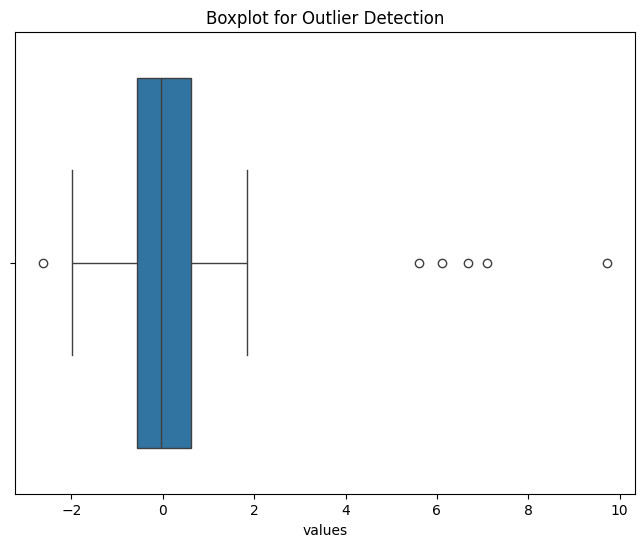

In [ ]:
z_scores=stats.zscore(df['values'])
outliers_zscore=df[np.abs(z_scores)>3]

plt.figure(figsize=(8,6))
sns.boxplot(x=df['values'])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [ ]:
df_capped=df.copy()
df_capped['values']=np.clip(df_capped['values'],lower_bound,upper_bound)
print(df_capped)

       values
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100  2.372622
101  2.372622
102  2.372622
103  2.372622
104  2.372622

[105 rows x 1 columns]


In [ ]:
#removal
df_removed =df.copy()
df_removed =df_removed[(df_removed['values'] >= lower_bound) & (df_removed['values'] <= upper_bound)]
print(df_removed)

      values
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [ ]:
df_imputed =df.copy()
median_value =df_imputed['values'].median()
df_imputed['values'] = np.where((df_imputed['values'] < lower_bound) | (df_imputed['values'] > upper_bound), median_value, df_imputed['values'])
print(df_imputed)

       values
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100 -0.035826
101 -0.035826
102 -0.035826
103 -0.035826
104 -0.035826

[105 rows x 1 columns]


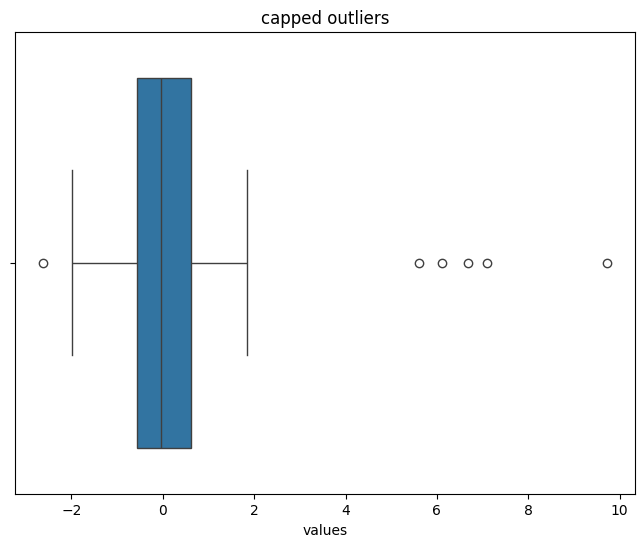

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['values'])
plt.title("capped outliers")
plt.show()
